In [49]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import validation_curve

import sys
sys.path.append('../src/')
import aposch_cv_src as aposch

Read in HLS as a single TIFF:

In [50]:
# where to go
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'
band = 'B03'

path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'

#features=[]
#print('Loading tiff file', path)

src = rasterio.open(path)
print(src.crs.is_geographic)


False


Here's useful info I can get out of a raster dataset:

In [51]:
print(src.height, src.width, src.count)
print(src.bounds)
print(src.transform)
print('Upper left corner is', src.transform * (0,0))

src.crs

3660 3660 1
BoundingBox(left=600000.0, bottom=4190220.0, right=709800.0, top=4300020.0)
| 30.00, 0.00, 600000.00|
| 0.00,-30.00, 4300020.00|
| 0.00, 0.00, 1.00|
Upper left corner is (600000.0, 4300020.0)


CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [52]:
array = src.read(1)
feature = array.flatten()
#features.append(feature)
print(f'Number of pixels for {final_folder}.{band} is length n={len(feature)}')

Number of pixels for HLS.L30.T10SFH.2020007T183941.v2.0.B03 is length n=13395600


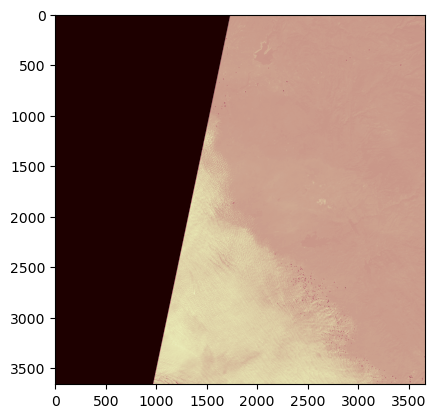

In [53]:
plt.imshow(array, cmap='pink')
#plt.show()

Try this other date:

In [22]:
final_folder = 'HLS.L30.T10SFH.2020119T183859.v2.0'

In [23]:
# where to go
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
#final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'
band = 'B03'


path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}/{final_folder}.{band}.tif'

features=[]
print('Loading tiff file', path)
with rasterio.open(path) as src:
    array = src.read(1)
    feature = array.flatten()
    features.append(feature)
    print(f'Number of pixels for {final_folder}.{band} is length n={len(feature)}')

Loading tiff file ../data/hls_23feb23/L30/2020/10/S/F/H/HLS.L30.T10SFH.2020119T183859.v2.0/HLS.L30.T10SFH.2020119T183859.v2.0.B03.tif
Number of pixels for HLS.L30.T10SFH.2020119T183859.v2.0.B03 is length n=13395600


In [25]:
features[0]

array([-9999, -9999, -9999, ...,   510,   538,   553], dtype=int16)

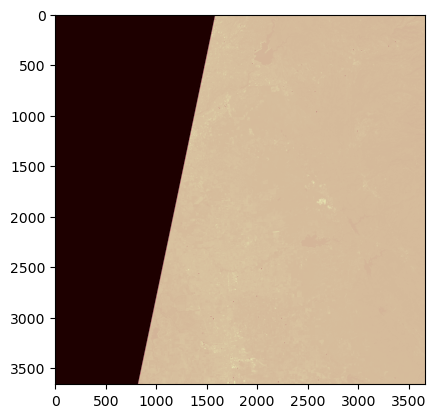

In [24]:
plt.imshow(array, cmap='pink')
#plt.show()

Read in as an entire set of TIFFs for different bands: (THIS does not work)

In [11]:
# where to go
sat = 'L30'
year = 2020
tile_path = '10/S/F/H'
tile = '10SFH'
final_folder = 'HLS.L30.T10SFH.2020007T183941.v2.0'


path = f'../data/hls_23feb23/{sat}/{year}/{tile_path}/{final_folder}'

features=[]
print('Loading tiff file', path)
with rasterio.open(path) as src:
    array = src.read(1)
    feature = array.flatten()
    features.append(feature)
    print(f'Number of pixels for {final_folder} is length n={len(feature)}')

Loading tiff file ../data/hls_23feb23/L30/2020/10/S/F/H/HLS.L30.T10SFH.2020007T183941.v2.0


RasterioIOError: ../data/hls_23feb23/L30/2020/10/S/F/H/HLS.L30.T10SFH.2020007T183941.v2.0: Permission denied

In [ ]:
county = 'Yolo'
years = range(2017,2022)
features = []

for year in years:
    tiff = f'../Data/{county}CountyCDL_{year}/clipped.TIF'
    print('Loading tiff file', tiff)
    with rasterio.open(tiff) as src:
        array = src.read(1)
        feature = array.flatten()
        features.append(feature)
        print(f'Feature for year {year} is length n={len(feature)}')